In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

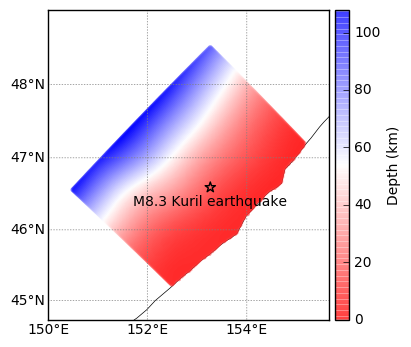

In [9]:
fig=plt.figure()
ax=fig.add_subplot(111)

data=np.loadtxt('work/knot_value.dat',usecols=(2,3,4))
tlat=data[:,0]; tlon=data[:,1]; tdep=data[:,2]
logical=np.genfromtxt('work/knot_value.dat',usecols=(8),dtype=str)

#discard knots outside of slab1.0 model
j=0
lat=[]; lon=[]; dep=[]
for i in np.arange(0,len(tlat),1):
    if logical[i] == 'T':
        j=j+1
        lat.append(tlat[i])
        lon.append(tlon[i])
        dep.append(tdep[i])
        

m = Basemap(llcrnrlon=min(lon)-0.5,llcrnrlat=min(lat)-0.5,urcrnrlon=max(lon)+0.5,urcrnrlat=max(lat)+0.5,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='i',projection='merc')
m.drawparallels(np.arange(-90,90,1),labels=[1,0,0,0], color='gray', linewidth=0.5)
m.drawmeridians(np.arange(0,360,2),labels=[0,0,0,1], color='gray', linewidth=0.5)

x, y = m(lon, lat)
cm = plt.cm.get_cmap('bwr_r')
sc = m.scatter(x,y,c=dep,s=10,cmap=cm,vmin=0,vmax=max(dep),edgecolor='none',clip_on=False,alpha=0.5)
m.colorbar(sc, ticks=np.arange(0, max(dep), 20)).set_label('Depth (km)')

data=np.loadtxt('work/epicenter.dat')
elat=data[0]; elon=data[1]
x, y = m(elon, elat)
m.scatter(x, y, s = 60, marker='*', facecolor='none')
x, y = m(elon, elat-0.1)
plt.text(x,y,'M8.3 Kuril earthquake',va='top',ha='center')

data=np.loadtxt('data/kur_top.in')
lon=data[:,0]; lat=data[:,1]
x, y = m(lon, lat)
m.plot(x,y,linewidth=0.5,color='k',zorder=0)

plt.savefig('work/FaultMod2006Kuril.png', bbox_inches="tight", pad_inches=0.1)
plt.show()